In [1]:
# Originalquelle der Daten: https://www.kaggle.com/orgesleka/used-cars-database

# Damit ihr euch dort aber nicht registrieren müsst, habe ich mich entschlossen,
# diese auf meinem eigenen Webspace zu hosten. 

import urllib3

url = "http://downloads.codingcoursestv.eu/035%20-%20machine%20learning/data/autos.csv.bz2"

http = urllib3.PoolManager()
download = http.urlopen("GET", url, preload_content = False)  
data = download.read()

with open('autos.csv.bz2', 'wb') as f:  
    f.write(data)

### Ziel: Wir möchten ein Modell entwickeln, welches für *gewöhnliche* Autos den Verkaufspreis schätzen kann

In [41]:
import pandas as pd

df = pd.read_csv("./autos.csv.bz2", encoding = "iso8859-1")

df = df.drop(["dateCrawled", "abtest", "dateCreated", "nrOfPictures", "lastSeen", "postalCode", "seller", "offerType"], axis = 1)

In [42]:
print(len(df))

371528


In [43]:
#print(df["abtest"].unique())

# zählen wie oft test oder control in der Spalte steht
#print(len(df[df["abtest"] == "test"]))
#print(len(df[df["abtest"] == "control"]))

In [44]:
import numpy as np

# Problem, dass 13 Monate von 0-12 eingetragen sind und 0 bedeutet nicht bekannt
# wenn Monat 0 dann packe den Wert 6 (Mitte des Jahres) rein ansonsten den echten Wert stehen lassen
df["monthOfRegistration"] = np.where(df["monthOfRegistration"] == 0, 6, df["monthOfRegistration"])

# registration wird als Kommazahl angegeben
df["registration"] = df["yearOfRegistration"]  + (df["monthOfRegistration"] - 1) /12

df = df.drop(["yearOfRegistration", "monthOfRegistration"], axis = 1)

In [45]:
df.head()

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,registration
0,Golf_3_1.6,480,NaN,manuell,0,golf,150000,benzin,volkswagen,NaN,1993.416667
1,A5_Sportback_2.7_Tdi,18300,coupe,manuell,190,NaN,125000,diesel,audi,ja,2011.333333
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,automatik,163,grand,125000,diesel,jeep,NaN,2004.583333
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,2001.416667
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,2008.500000


In [18]:
df["seller"].unique()

array(['privat', 'gewerblich'], dtype=object)

In [20]:
# gewerblich kommt nur 3 mal in 371528 Zeilen vor, also kann diese Spalte löschen
len(df[df["seller"]== "gewerblich"])

3

In [21]:
df["seller"].describe()

count     371528
unique         2
top       privat
freq      371525
Name: seller, dtype: object

In [22]:
# kann auch gelöscht werden, da die Zeilen überwiegend Angebot beeinhalten
df["offerType"].describe()

count      371528
unique          2
top       Angebot
freq       371516
Name: offerType, dtype: object

In [46]:
df.head()

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,registration
0,Golf_3_1.6,480,NaN,manuell,0,golf,150000,benzin,volkswagen,NaN,1993.416667
1,A5_Sportback_2.7_Tdi,18300,coupe,manuell,190,NaN,125000,diesel,audi,ja,2011.333333
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,automatik,163,grand,125000,diesel,jeep,NaN,2004.583333
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,2001.416667
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,2008.500000


In [47]:
# Zeilen mit Price = 0 ausgeben
df[df["price"] == 0]

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,registration
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,manuell,50,andere,40000,benzin,volkswagen,nein,1980.500000
40,Suche_Opel_corsa_a_zu_verschenken,0,NaN,NaN,0,corsa,150000,benzin,opel,NaN,1990.000000
115,Golf_IV_1.4_16V,0,NaN,manuell,0,golf,5000,benzin,volkswagen,NaN,2017.916667
119,Polo_6n_Karosse_zu_verschenken,0,kleinwagen,NaN,0,NaN,5000,benzin,volkswagen,NaN,1999.416667
157,Opel_meriva_1.6_16_v_lpg__z16xe_no_OPC,0,bus,manuell,101,meriva,150000,lpg,opel,ja,2004.750000
...,...,...,...,...,...,...,...,...,...,...,...
371356,Verkaufen_einen_Opel_corsa_b_worlcup_cool,0,NaN,manuell,65,corsa,150000,NaN,opel,ja,2000.416667
371392,Ford_Fiesta_1.3___60PS___Bj_2002___Klima___Servo,0,kleinwagen,manuell,60,fiesta,150000,benzin,ford,NaN,2002.166667
371402,Suzuki_Swift_zu_verkaufen,0,kleinwagen,manuell,53,swift,150000,benzin,suzuki,NaN,1999.166667
371431,Seat_Arosa,0,kleinwagen,manuell,37,arosa,150000,benzin,seat,ja,1999.500000


In [48]:
# price = 0 löschen, da unplausible Daten
df = df.drop(df[df["price"] == 0].index)

# PS = 0 löschen, da unplausible Daten
df = df.drop(df[df["powerPS"] == 0].index)

In [49]:
df

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,registration
1,A5_Sportback_2.7_Tdi,18300,coupe,manuell,190,NaN,125000,diesel,audi,ja,2011.333333
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,automatik,163,grand,125000,diesel,jeep,NaN,2004.583333
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,2001.416667
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,2008.500000
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,manuell,102,3er,150000,benzin,bmw,ja,1995.750000
...,...,...,...,...,...,...,...,...,...,...,...
371520,turbo_defekt,3200,limousine,manuell,225,leon,150000,benzin,seat,ja,2004.333333
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,automatik,101,fortwo,125000,benzin,smart,nein,2000.166667
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,manuell,102,transporter,150000,diesel,volkswagen,nein,1996.166667
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,manuell,100,golf,150000,diesel,volkswagen,NaN,2002.416667


In [50]:
# Normalerweise muss man die Datenquelle untersuchen, warum NaN da steht
df["notRepairedDamage"].unique()

array(['ja', nan, 'nein'], dtype=object)

In [51]:
# setzt an der Stelle ja eine 1
df["notRepairedDamage"] = np.where(df["notRepairedDamage"] == "ja", 1, df["notRepairedDamage"])
df["notRepairedDamage"] = np.where(df["notRepairedDamage"] == "nein", 0, df["notRepairedDamage"])

In [53]:
# alle NaN Werte löschen
df = df[df["notRepairedDamage"].notnull()]

In [54]:
df

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,registration
1,A5_Sportback_2.7_Tdi,18300,coupe,manuell,190,NaN,125000,diesel,audi,1,2011.333333
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,0,2001.416667
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,0,2008.500000
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,manuell,102,3er,150000,benzin,bmw,1,1995.750000
6,Peugeot_206_CC_110_Platinum,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,0,2004.583333
...,...,...,...,...,...,...,...,...,...,...,...
371519,Alfa_Romeo_159_Jtdm_1.9_150_ps_13_600_km_top_voll,5250,NaN,automatik,150,159,150000,NaN,alfa_romeo,0,2016.916667
371520,turbo_defekt,3200,limousine,manuell,225,leon,150000,benzin,seat,1,2004.333333
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,automatik,101,fortwo,125000,benzin,smart,0,2000.166667
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,manuell,102,transporter,150000,diesel,volkswagen,0,1996.166667


In [58]:
df = df[(df["price"] < 50000) & (df["powerPS"]< 500) & (df["registration"] <= 2018)]

## Visualisieren

/Users/blertaduraku/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/blertaduraku/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/blertaduraku/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/blertaduraku/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


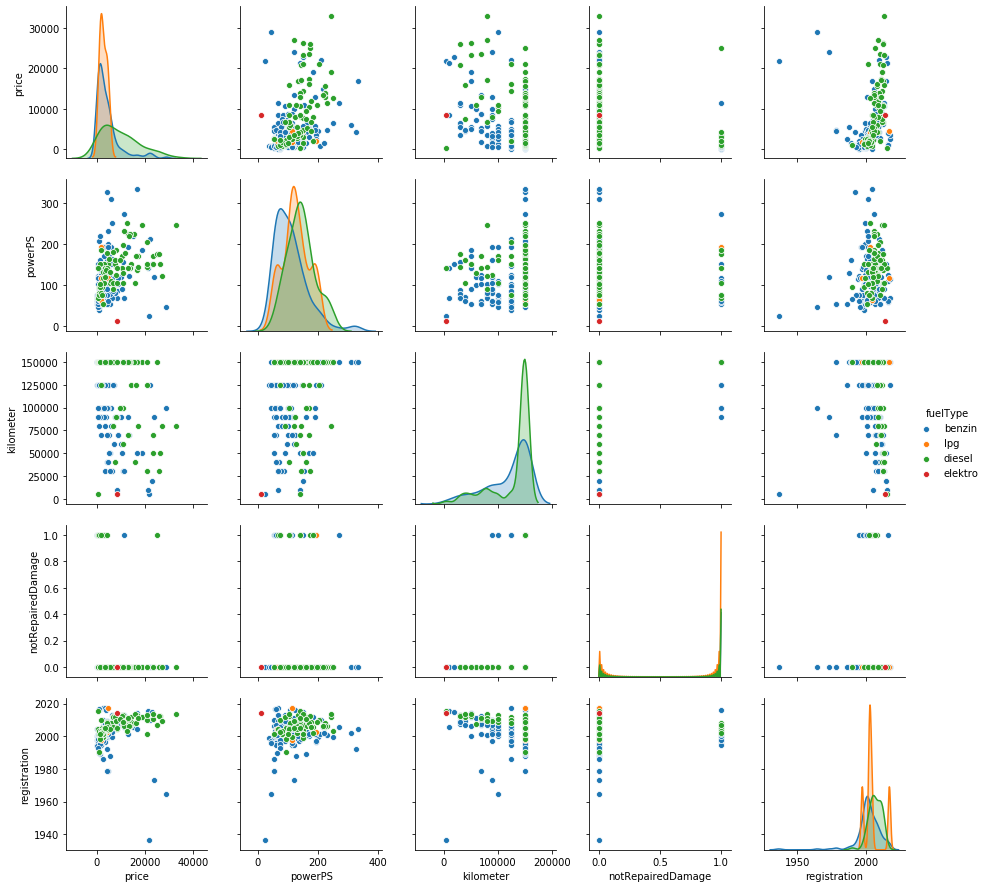

In [62]:
%matplotlib inline
import seaborn as sns

# df.sample wählt 250 zufällige Daten, damit die Grafik übersichtlicher ist und die Punkte nicht stark überlappen + bessere Laufzeit
g = sns.pairplot(df.sample(250), hue = "fuelType")

#### Diagonale : Gibt die Häufigkeit wieder

price: Die meisten Preise liegen unter 50.000 Euro

powerPS: Die meisten Autos haben zwischen 0 und ca. 125 PS

kilometer: Die meisten Autos haben viele Kilometer ca. zwischen 125.000 und 150.000

notRepairedDamage: die meisten Autos liegen bei 0 also keine reparierten Schäden

registration: die meisten Autos wurden ca. zwischen 1950 und 2000 registriert. 
- Achtung: Zahlenreihe geht bs 6000 und deutet auf fehlerhafte Daten hin, da das Jahr 6000 noch nicht eingetroffen ist --> Unplausible Daten
- Fehler behoben, indem alle Daten nach 2018 gelöscht worden sind


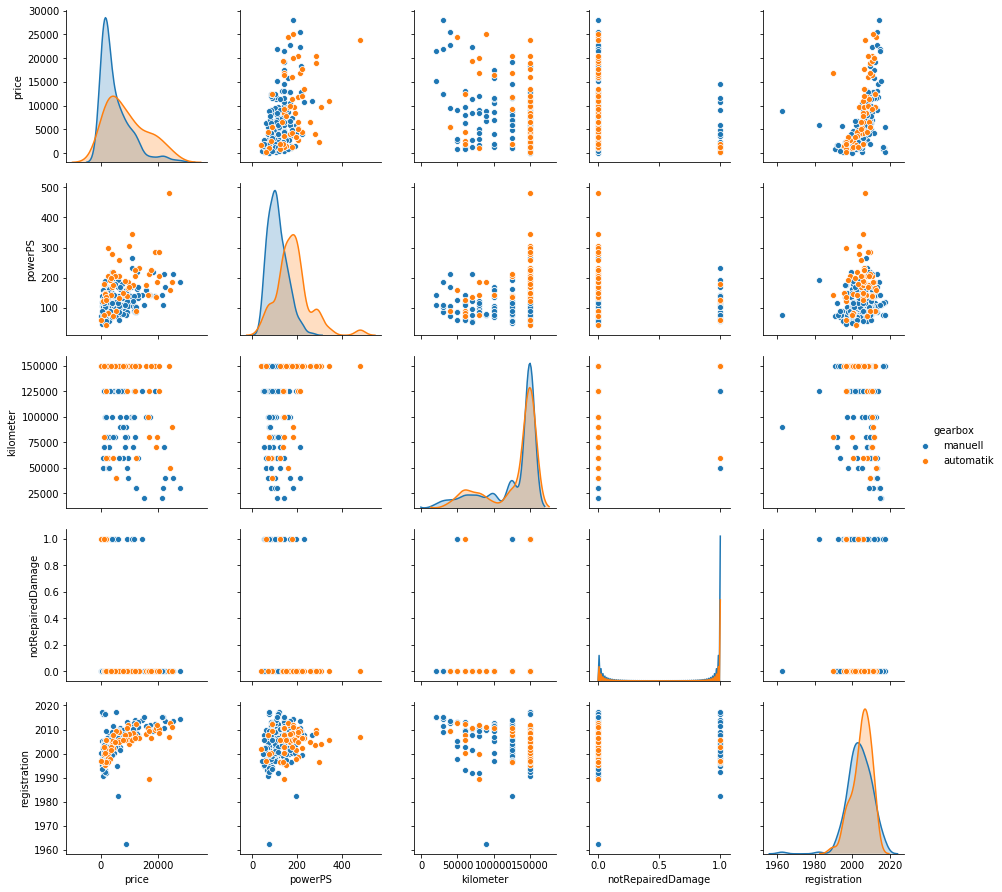

In [63]:
g = sns.pairplot(df.sample(250), hue = "gearbox")

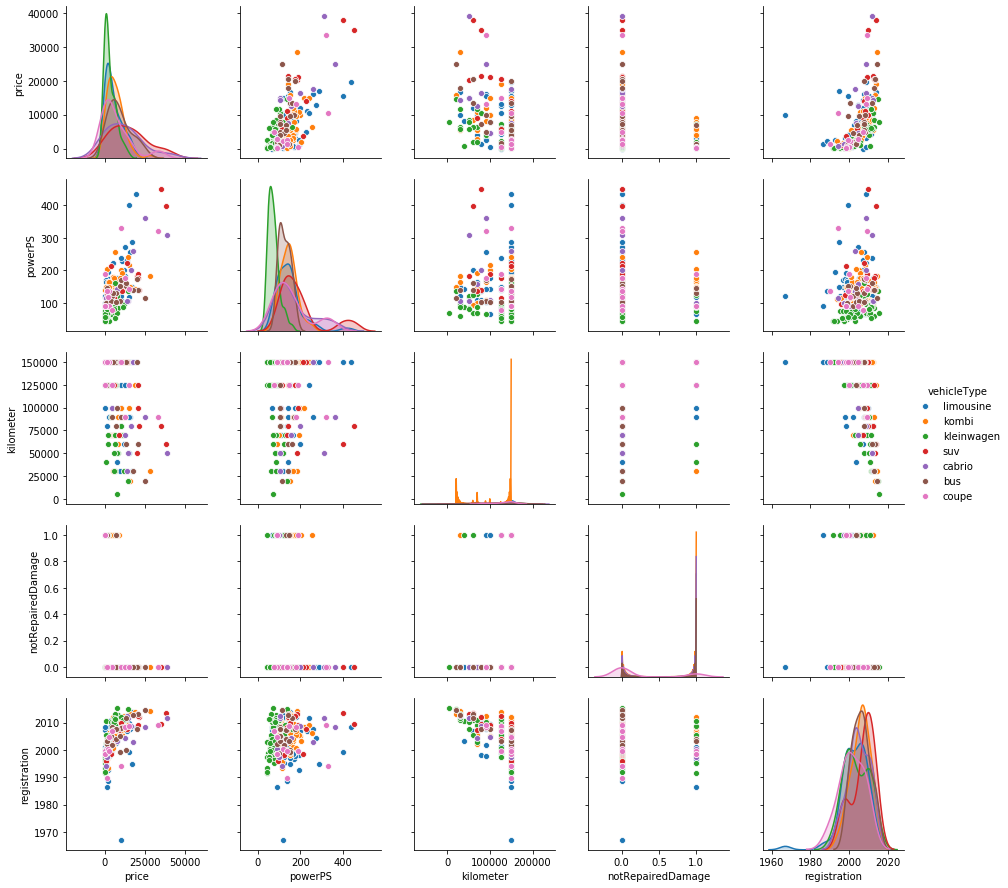

In [64]:
g = sns.pairplot(df.sample(250), hue = "vehicleType")

## Modelle erstellen

In [65]:
df.head()

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,registration
1,A5_Sportback_2.7_Tdi,18300,coupe,manuell,190,NaN,125000,diesel,audi,1,2011.333333
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,0,2001.416667
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,0,2008.500000
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,manuell,102,3er,150000,benzin,bmw,1,1995.750000
6,Peugeot_206_CC_110_Platinum,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,0,2004.583333


In [69]:
df2 = pd.get_dummies(df, columns = ["vehicleType", "gearbox", "fuelType", "brand"]).drop("model", axis = 1)
df2.head()

,name,price,powerPS,kilometer,notRepairedDamage,registration,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
1,A5_Sportback_2.7_Tdi,18300,190,125000,1,2011.333333,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,GOLF_4_1_4__3TÜRER,1500,75,150000,0,2001.416667,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,69,90000,0,2008.500000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,102,150000,1,1995.750000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Peugeot_206_CC_110_Platinum,2200,109,150000,0,2004.583333,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df2 = df2[(df2["price"] > 500) & (df2["price"] < 20000)]
Y = df2["price"]
X = df2.drop(["name", "price"], axis = 1)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

model = LinearRegression()
model.fit(X_train, Y_train)

print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.6499901176115863
0.6481250622749779
